# Step 1:  Import all neccessary libraries 

In [2]:
import numpy
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Step 2 : Import data 

In [3]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns=boston.feature_names)

## Step 3 : Basic descriptive analysis

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data['MEDV'] = boston.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.shape

(506, 14)

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [10]:
set_option('precision',2)
print(data.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.40 -5.53e-02  0.42 -0.22  0.35 -0.38  6.22e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.40 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.62 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.38  0.18  -0.36  4.88e-02 -0.

## Step 4 : Data visualization

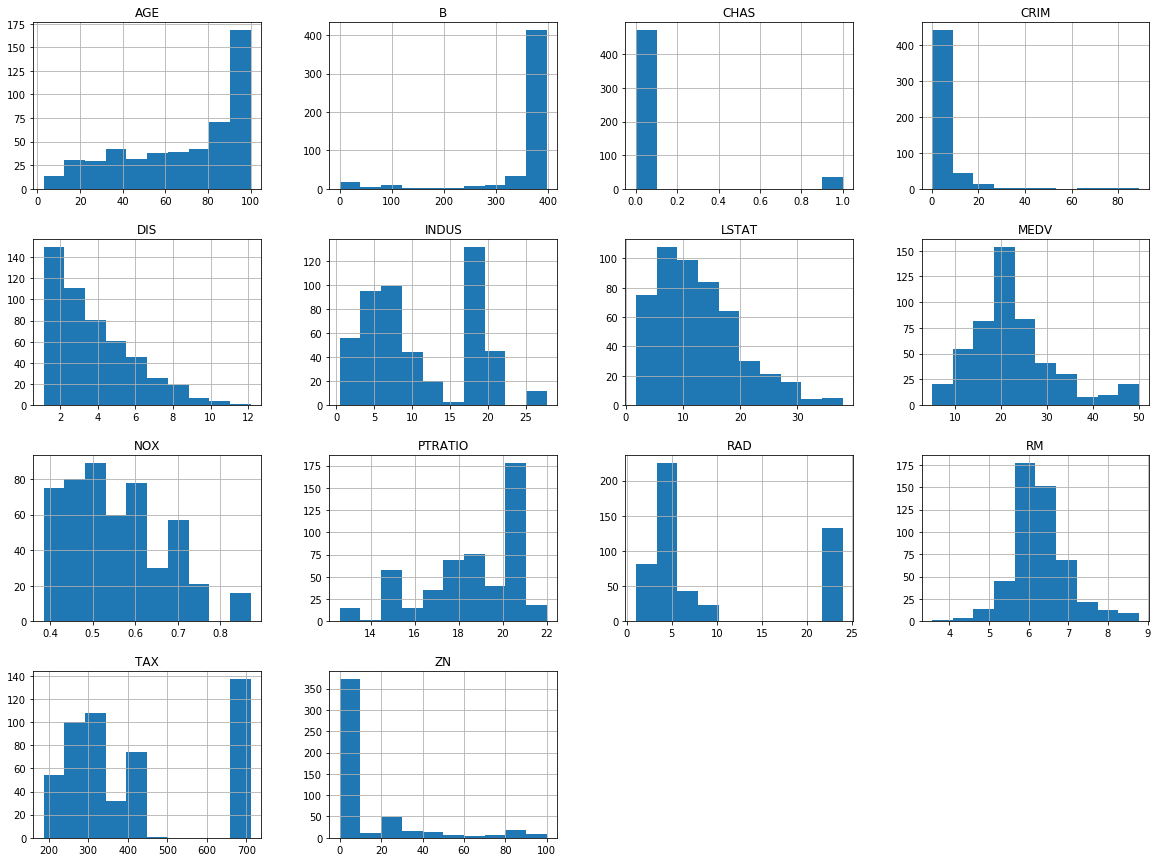

In [11]:
data.hist(sharex=False,sharey=False,figsize=(20,15))
plt.show()

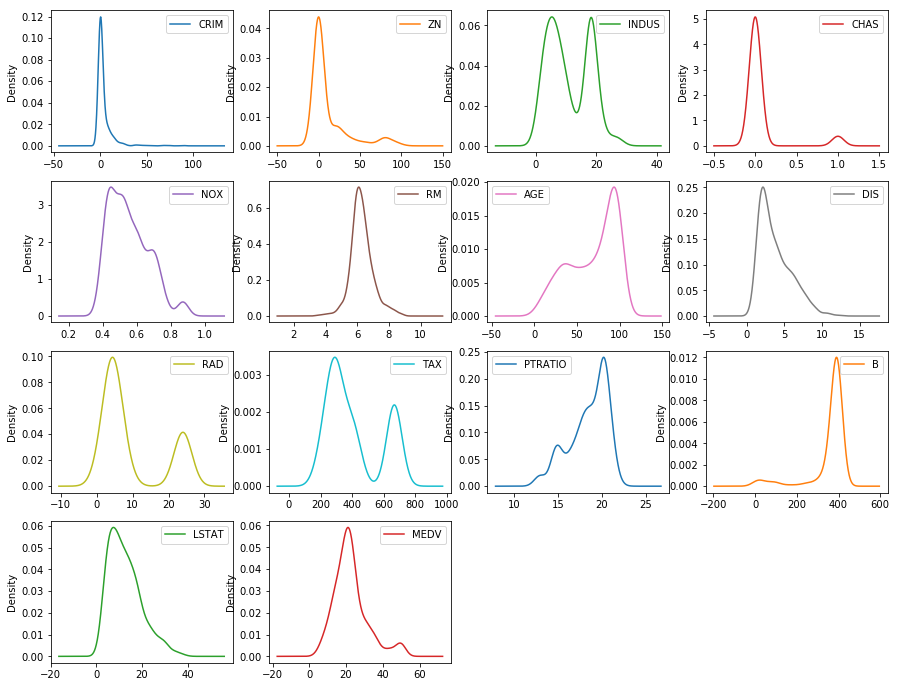

In [12]:
data.plot(kind='density', subplots = True,sharex = False,layout=(4,4),figsize=(15,12))
plt.show()

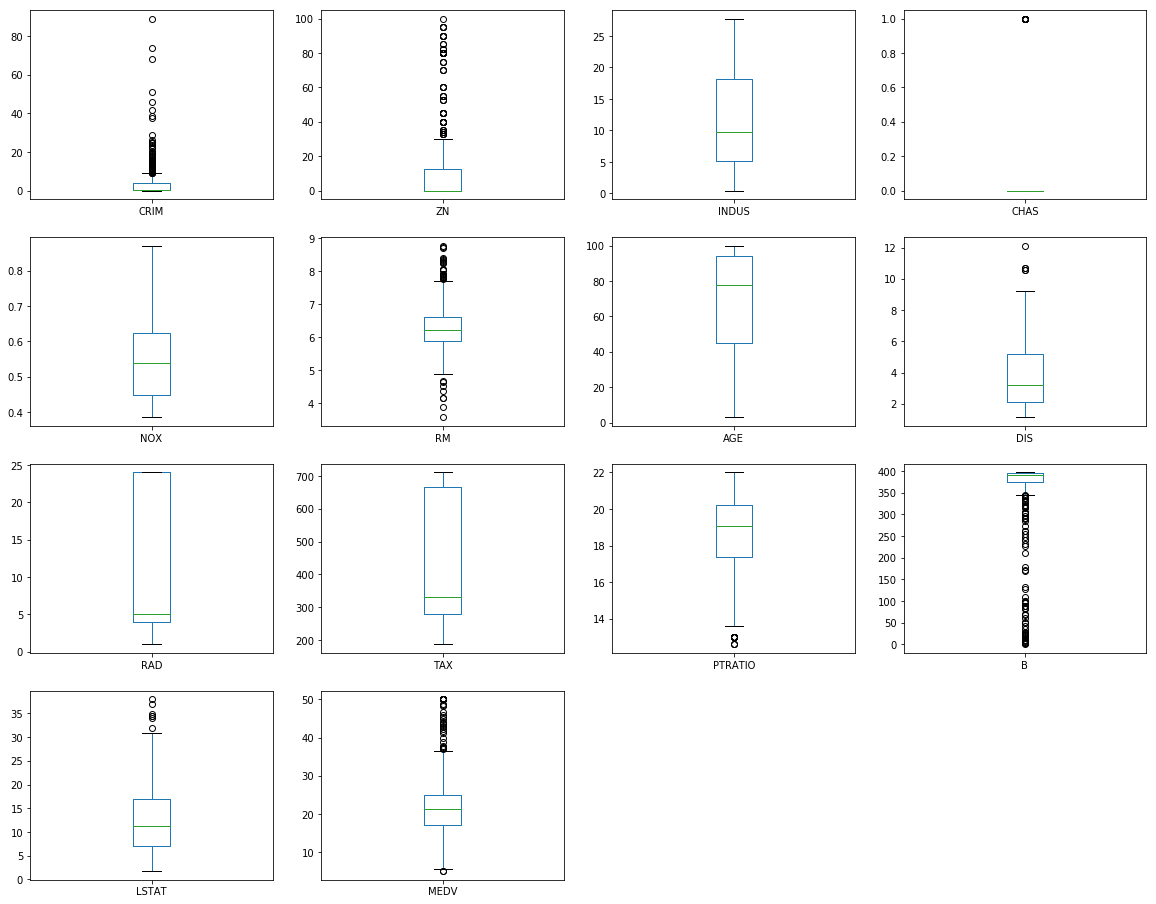

In [13]:
data.plot(kind = 'box', subplots=True,layout = (4,4),sharex = False,sharey = False, figsize=(20,16))
plt.show()

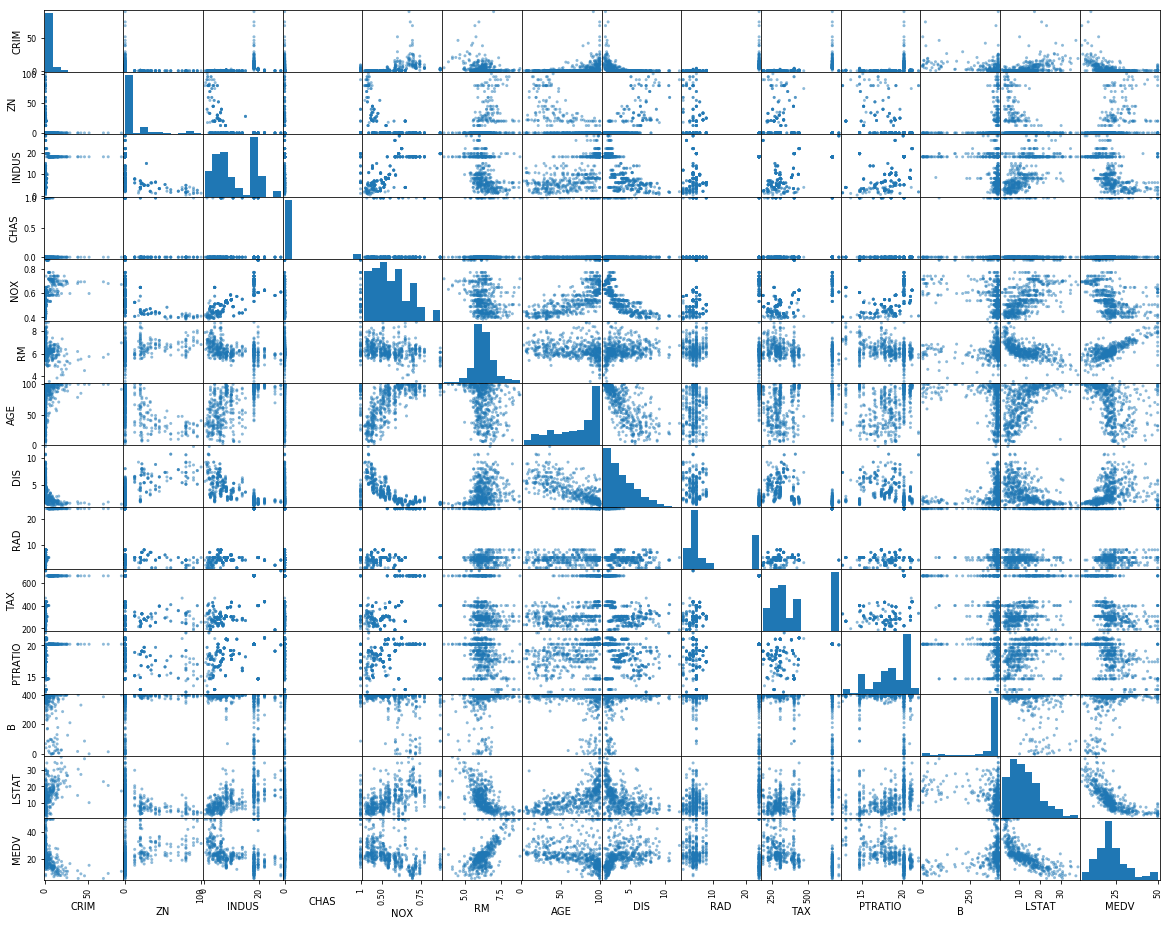

In [14]:
scatter_matrix(data,figsize=(20,16))
plt.show()

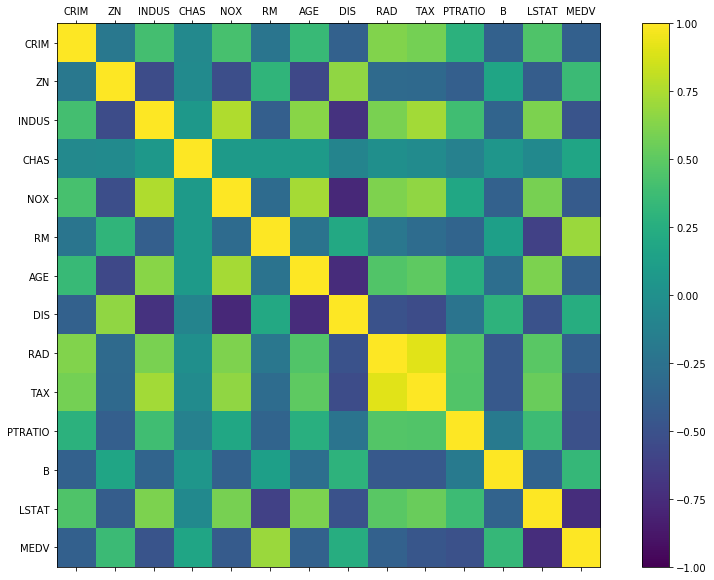

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation= 'none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Step 5 : Train-test split

In [19]:
array = data.values
X = array[:,0:13]
y = array[:,13]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 7)

In [20]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

## Step 6 : Model comparision

In [21]:
models = []
models.append(( 'LR' , LinearRegression()))
models.append(( 'LASSO' , Lasso()))
models.append(( 'EN' , ElasticNet()))
models.append(( 'KNN' , KNeighborsRegressor()))
models.append(( 'CART' , DecisionTreeRegressor()))
models.append(( 'SVR' , SVR()))

In [22]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -21.400099 (9.390450)
LASSO: -26.431547 (11.655308)
EN: -27.504052 (12.309801)
KNN: -41.896488 (13.901688)
CART: -29.344978 (12.272085)
SVR: -85.518342 (31.994798)


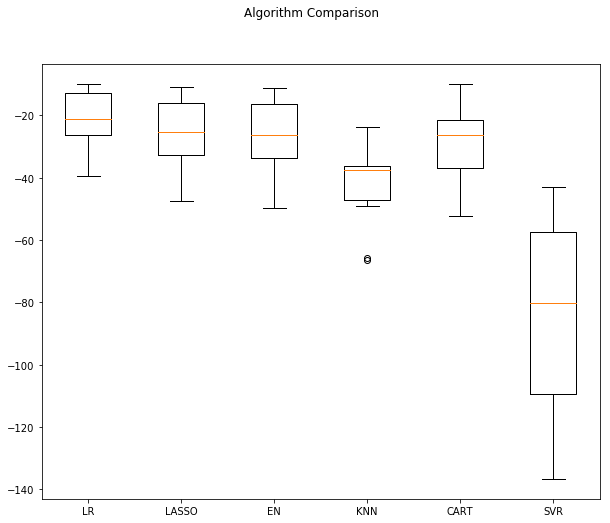

In [27]:
fig = plt.figure(figsize=(10,8))
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Step 7 : Standardization and pipelining

In [ ]:
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,    LinearRegression())])))
pipelines.append(( 'ScaledLASSO' , Pipeline([( 'Scaler' , StandardScaler()),( 'LASSO' ,    Lasso())])))
pipelines.append(( 'ScaledEN' , Pipeline([( 'Scaler' , StandardScaler()),( 'EN' ,    ElasticNet())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,   KNeighborsRegressor())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,    DecisionTreeRegressor())])))
pipelines.append(( 'ScaledSVR' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVR' , SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

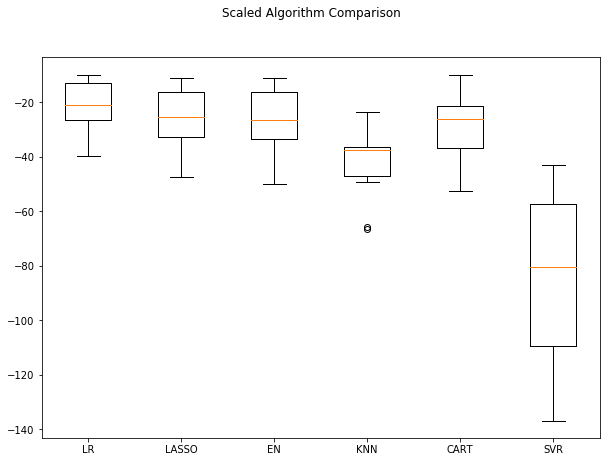

In [29]:
fig = plt.figure(figsize=(10,7))
fig.suptitle( "Scaled Algorithm Comparison" )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [31]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.133171 using {'n_neighbors': 3}
-20.373936 (15.036687) with: {'n_neighbors': 1}
-18.133171 (12.958886) with: {'n_neighbors': 3}
-20.139550 (12.199280) with: {'n_neighbors': 5}
-20.560152 (12.348131) with: {'n_neighbors': 7}
-20.382691 (11.617326) with: {'n_neighbors': 9}
-21.052064 (11.621184) with: {'n_neighbors': 11}
-21.157689 (11.938415) with: {'n_neighbors': 13}
-21.538655 (11.532863) with: {'n_neighbors': 15}
-22.796125 (11.605158) with: {'n_neighbors': 17}
-23.885472 (11.362449) with: {'n_neighbors': 19}
-24.364986 (11.920959) with: {'n_neighbors': 21}


## Step 8 : Comparing ensemble techniques

In [32]:
ensembles = []
ensembles.append(( 'ScaledAB' , Pipeline([( 'Scaler' , StandardScaler()),( 'AB' ,
    AdaBoostRegressor())])))
ensembles.append(( 'ScaledGBM' , Pipeline([( 'Scaler' , StandardScaler()),( 'GBM' ,
    GradientBoostingRegressor())])))
ensembles.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'RF' ,
    RandomForestRegressor())])))
ensembles.append(( 'ScaledET' , Pipeline([( 'Scaler' , StandardScaler()),( 'ET' ,
    ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -15.762700 (7.434105)
ScaledGBM: -9.573959 (4.191126)
ScaledRF: -13.430081 (7.502417)
ScaledET: -11.074502 (5.944353)


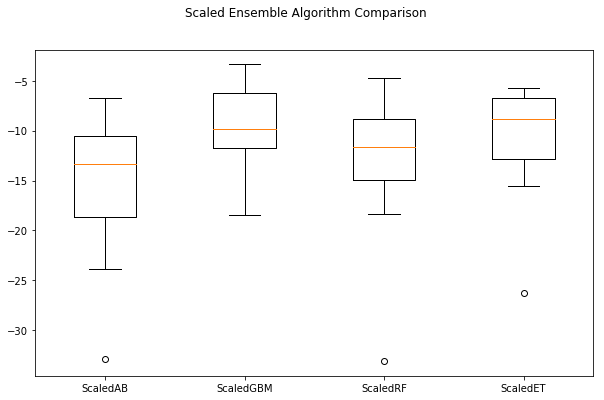

In [35]:

fig = plt.figure(figsize=(10,6))
fig.suptitle( 'Scaled Ensemble Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [37]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.061160 using {'n_estimators': 250}
-10.437617 (4.424556) with: {'n_estimators': 50}
-9.574391 (4.145705) with: {'n_estimators': 100}
-9.251591 (3.992446) with: {'n_estimators': 150}
-9.184214 (4.056788) with: {'n_estimators': 200}
-9.061160 (4.003336) with: {'n_estimators': 250}
-9.064721 (4.029519) with: {'n_estimators': 300}
-9.076152 (4.034430) with: {'n_estimators': 350}
-9.132329 (4.085341) with: {'n_estimators': 400}


## Step 9 : Finalizing model

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [39]:
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

11.9601112194
